In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_list

Text(0.5, 1.0, 'Rocket Transform')

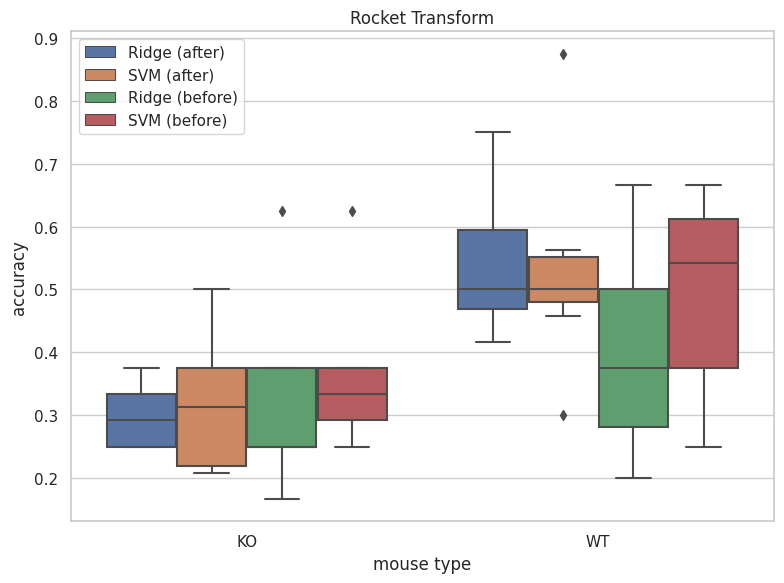

In [8]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout = True, sharey=True)
file_model = [
    ("tsc_train_rocket_Ridge_uniform_num_of_samples_False", "Ridge (after)"),
    ("tsc_train_rocket_SVM_uniform_num_of_samples_False", "SVM (after)"),
    ("tsc_train_rocket_Ridge_threshold_segment_False", "Ridge (before)"),
    ("tsc_train_rocket_SVM_threshold_segment_False", "SVM (before)"),
    # ("tsc_train_rocket_Kmeans_threshold_segment_False", "KMeans"),
    # ("tsc_train_rocket_Softmax_threshold_segment_False", "Softmax"),
    # ("tsc_train_rocket_Ridge_threshold_segment_behavior shuffling", "Ridge Behavior Shuffle"),
    # ("tsc_train_rocket_Ridge_threshold_segment_events shuffling", "Ridge Events Shuffle"),
    # ("tsc_train_rocket_SVM_threshold_segment_behavior shuffling", "SVM Behavior Shuffle"),
    # ("tsc_train_rocket_SVM_threshold_segment_events shuffling", "SVM Events Shuffle"),

]
accu_list = []
for file_name, model in file_model:
    for m_id, data_dir in enumerate(datalist):
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        accu = np.mean(results["scores"])
        if "KO" in data_name:
            accu_list.append((accu, "KO", model, data_name))
        else:
            accu_list.append((accu, "WT", model, data_name))

df = pd.DataFrame(accu_list, columns=["score", "mouse type", "model", "data_name"])
sns.boxplot(x="mouse type", y ="score", hue="model", data=df, ax=ax)
ax.set_ylabel("accuracy")
ax.legend(loc="upper left")
ax.set_title("Rocket Transform")


## Outliers

In [9]:
[i for i in accu_list if i[2] == "SVM (before)"]

[(0.625, 'KO', 'SVM (before)', '091317 OF CaMKII HKO M19-n1'),
 (0.2916666666666667, 'KO', 'SVM (before)', '092217 OF CaMKII HKO M30-n1'),
 (0.375, 'WT', 'SVM (before)', 'M45_042718_OF'),
 (0.3333333333333333, 'KO', 'SVM (before)', '091317 OF CaMKII HKO M20-n1'),
 (0.375, 'WT', 'SVM (before)', 'M46_042718_OF'),
 (0.25, 'KO', 'SVM (before)', 'CK_KO_RN1_OF'),
 (0.5416666666666666, 'WT', 'SVM (before)', 'CK_WT_RN3_OF'),
 (0.375, 'KO', 'SVM (before)', '090817 OF CaMKII HKO M22-n1'),
 (0.25, 'WT', 'SVM (before)', '092217 OF CaMKII WT M29-n1'),
 (0.6666666666666666, 'WT', 'SVM (before)', 'M44_042718_OF'),
 (0.625, 'WT', 'SVM (before)', '092717 OF SERT WT M32-n1'),
 (0.6, 'WT', 'SVM (before)', '081117 OF B6J M27-n1')]

In [10]:
[i for i in accu_list if i[2] == "SVM (after)"]

[(0.375, 'KO', 'SVM (after)', '091317 OF CaMKII HKO M19-n1'),
 (0.20833333333333334, 'KO', 'SVM (after)', '092217 OF CaMKII HKO M30-n1'),
 (0.5, 'WT', 'SVM (after)', 'M45_042718_OF'),
 (0.5, 'KO', 'SVM (after)', '091317 OF CaMKII HKO M20-n1'),
 (0.5, 'WT', 'SVM (after)', 'M46_042718_OF'),
 (0.21875, 'KO', 'SVM (after)', 'CK_KO_RN1_OF'),
 (0.4583333333333333, 'WT', 'SVM (after)', 'CK_WT_RN3_OF'),
 (0.3125, 'KO', 'SVM (after)', '090817 OF CaMKII HKO M22-n1'),
 (0.5625, 'WT', 'SVM (after)', '092217 OF CaMKII WT M29-n1'),
 (0.5416666666666666, 'WT', 'SVM (after)', 'M44_042718_OF'),
 (0.875, 'WT', 'SVM (after)', '092717 OF SERT WT M32-n1'),
 (0.3, 'WT', 'SVM (after)', '081117 OF B6J M27-n1')]